In [1]:
# mieyhgnaj set 🤪

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

import missingno as msno
import plotly.express as px
from matplotlib import cm
from matplotlib import style
from matplotlib import font_manager
from matplotlib import rc

rc('font', family='Arial Unicode MS')

import warnings
warnings.filterwarnings("ignore")

In [26]:
train = pd.read_csv('datas/csv/train_encode_ver2.csv', index_col=0)
train_nan = pd.read_csv('datas/csv/train_nanmedian.csv', index_col=0)
train_kmeans = pd.read_csv('datas/csv/train_out_filled_kmeans.csv', index_col=0)

test = pd.read_csv('datas/csv/test_encode_ver2.csv', index_col=0)

In [8]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import make_scorer

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()
nm = Normalizer()

In [10]:
# encoding ver.
categorical_features = [0, 1, 2, 3, 4, 5, 6,
                        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
                        45, 46, 47, 48, 49]

In [12]:
from collections import Counter
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import plot_confusion_matrix

# smotenc + algorithm => score + confusion_matrix 출력 함수
def get_result(model, train, test, scale=None):
    
    # split data
    X_train = train.drop(columns=['fraud_YN'])
    X_test = test.drop(columns=['fraud_YN'])
    y_train = train.fraud_YN
    y_test = test.fraud_YN

    # over-sampling
    smotenc = SMOTENC(categorical_features=categorical_features,
                                   random_state=4)
    X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)

    # scaling
    if scale!=None:
        X_resampled[['x14','x15']] = scale.fit_transform(X_resampled[['x14','x15']])
        X_test[['x14','x15']] = scale.transform(X_test[['x14','x15']])
        
    model.fit(X_resampled, y_resampled)
    pred = model.predict(X_test)
    
    # result 출력
    print("√", model, "\n------------------------------------------------------")
    print("Accuracy: ", balanced_accuracy_score(y_test, pred), "\n------------------------------------------------------")
    print(classification_report_imbalanced(y_test, pred, digits=6), "\n")
    
    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization \n", None),
                      ("Normalized confusion matrix \n", 'true')]

#     # save result
#     matrix = confusion_matrix(y_test, pred)
#     global df_result
#     df_result = df_result.append({'algorithm':model, 'confusion_matrix':[matrix[0],matrix[1]]
#                                   , 'sampler':smotenc ,'scale':scale}, ignore_index=True)
    
    #train
    for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(4.4,4.4))
        plt.rcParams.update({'font.size': 14})
        disp = plot_confusion_matrix(model, X_resampled, y_resampled,
                                     display_labels=['fraud_N', 'fraud_Y'],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize, ax=ax)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    # test
    for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(4.4,4.4))
        plt.rcParams.update({'font.size': 14})
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=['fraud_N', 'fraud_Y'],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize, ax=ax)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)
    
    plt.show()

In [14]:
# model 1

√ SVC(C=5, coef0=1, kernel='poly', random_state=4) 
------------------------------------------------------
Accuracy:  0.6488668685200477 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.999272  0.440591  0.857143  0.611544  0.614532  0.361918      3114
          1   0.003432  0.857143  0.440591  0.006838  0.614532  0.393380         7

avg / total   0.997038  0.441525  0.856209  0.610188  0.614532  0.361989      3121
 

Confusion matrix, without normalization 

[[5736 7109]
 [4285 8560]]
Normalized confusion matrix 

[[0.44655508 0.55344492]
 [0.33359284 0.66640716]]
Confusion matrix, without normalization 

[[1372 1742]
 [   1    6]]
Normalized confusion matrix 

[[0.44059088 0.55940912]
 [0.14285714 0.85714286]]


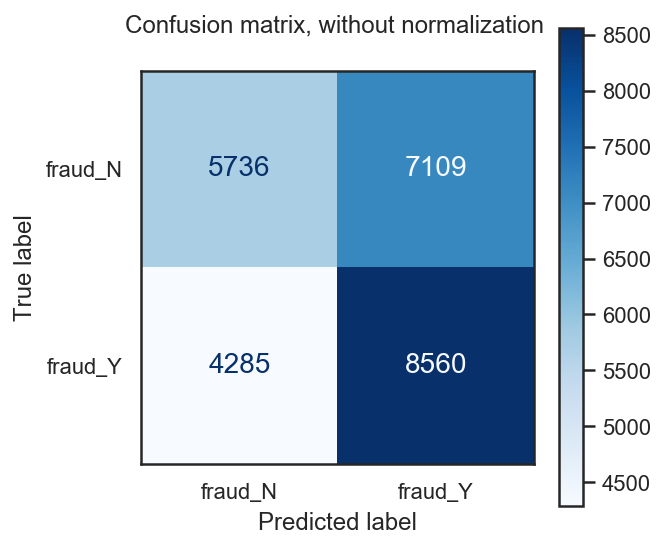

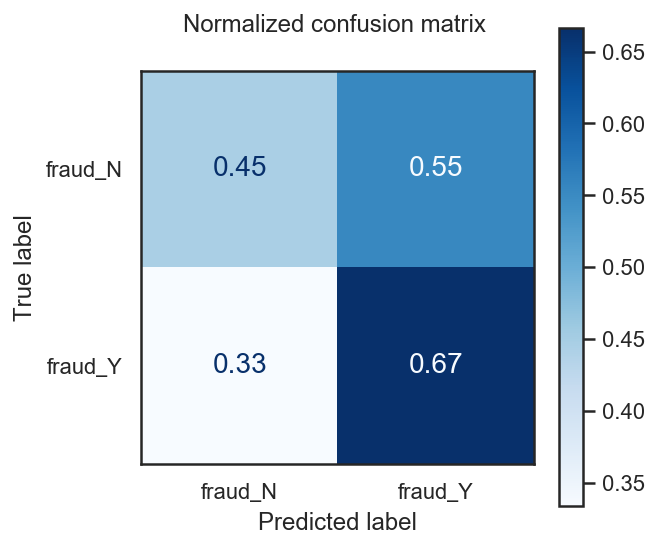

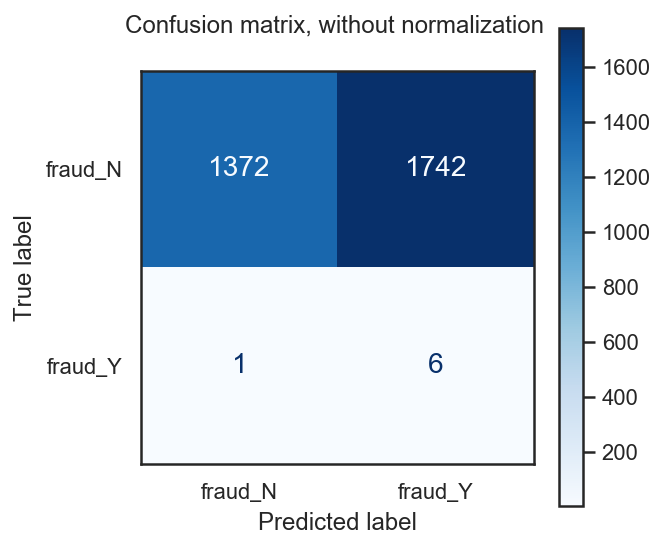

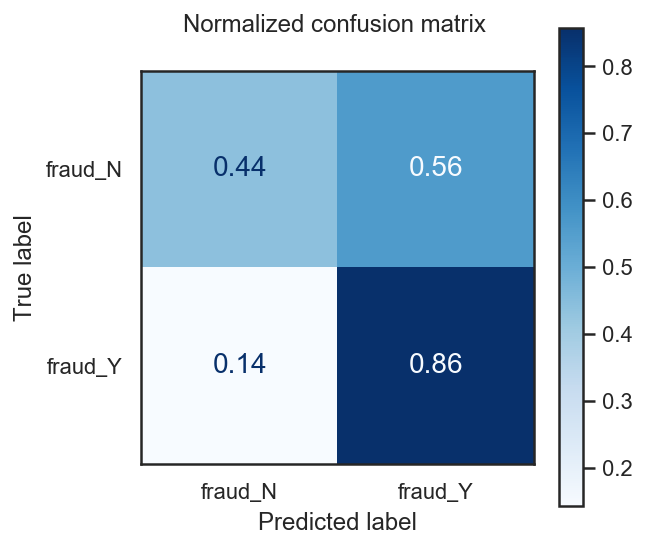

In [13]:
from sklearn.svm import SVC
model1 = SVC(kernel="poly", degree=3, coef0=1, C=5, random_state=4)
get_result(model, train, test)

In [16]:
# Model 2

√ SVC(C=5, coef0=1, kernel='poly', random_state=4) 
------------------------------------------------------
Accuracy:  0.435750986329021 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.997363  0.728645  0.142857  0.842086  0.322633  0.110190      3114
          1   0.001182  0.142857  0.728645  0.002345  0.322633  0.097995         7

avg / total   0.995128  0.727331  0.144171  0.840202  0.322633  0.110162      3121
 

Confusion matrix, without normalization 

[[ 4118  8727]
 [ 1647 11198]]
Normalized confusion matrix 

[[0.32059167 0.67940833]
 [0.1282211  0.8717789 ]]
Confusion matrix, without normalization 

[[2269  845]
 [   6    1]]
Normalized confusion matrix 

[[0.72864483 0.27135517]
 [0.85714286 0.14285714]]


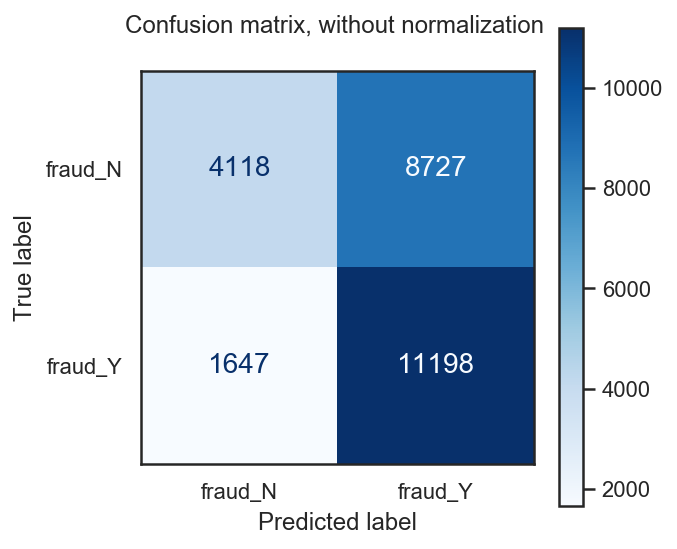

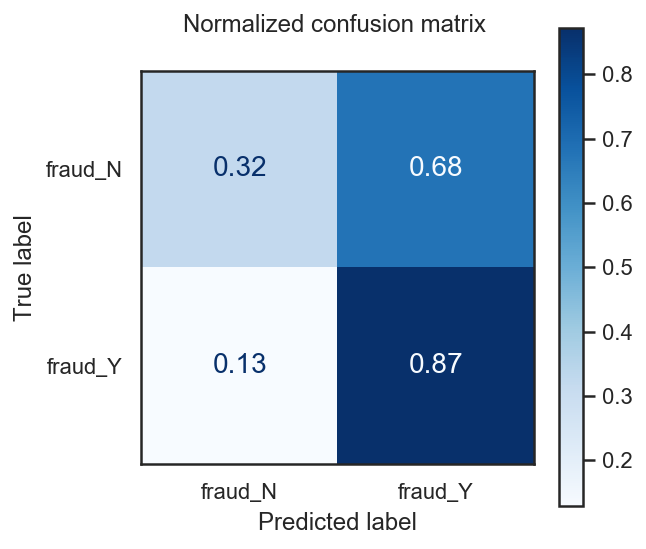

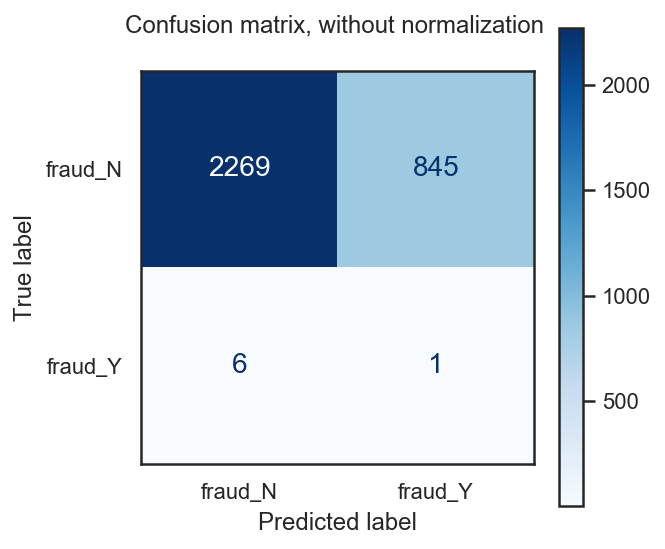

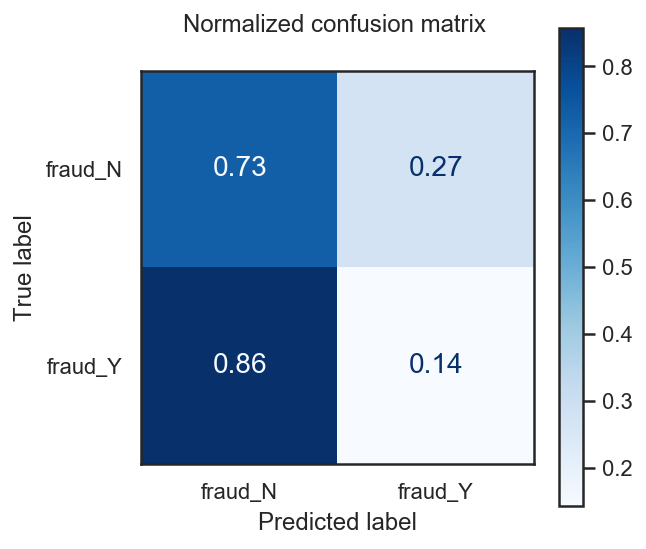

In [44]:
from sklearn.svm import SVC
model2 = SVC(kernel="poly", degree=3, coef0=1, C=5, random_state=4)
get_result(model, train_kmeans, test)

In [ ]:
# Model 3-1

√ LogisticRegression(C=0.01, class_weight={0: 0.5, 1: 0.4}, max_iter=200,
                   n_jobs=-1, random_state=4, tol=0.001) 
------------------------------------------------------
Accuracy:  0.7477979631158822 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.999179  0.781310  0.714286  0.876915  0.747047  0.561819      3114
          1   0.007289  0.714286  0.781310  0.014430  0.747047  0.554338         7

avg / total   0.996954  0.781160  0.714436  0.874980  0.747047  0.561802      3121
 

Confusion matrix, without normalization 

[[12845     0]
 [12845     0]]
Normalized confusion matrix 

[[1. 0.]
 [1. 0.]]
Confusion matrix, without normalization 

[[2433  681]
 [   2    5]]
Normalized confusion matrix 

[[0.78131021 0.21868979]
 [0.28571429 0.71428571]]


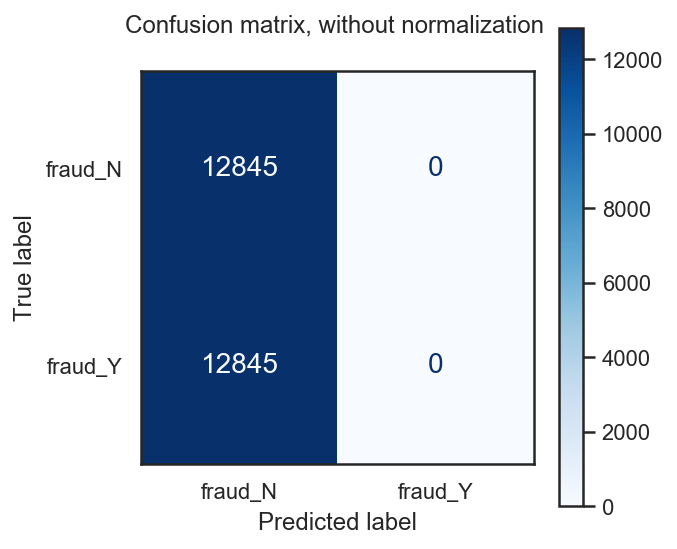

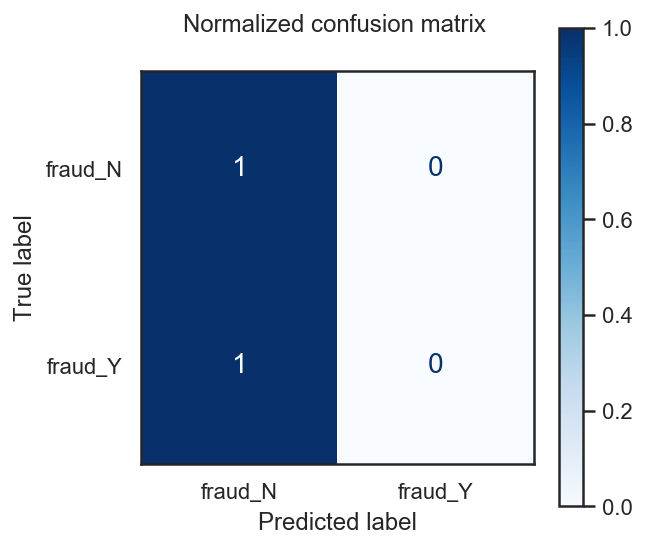

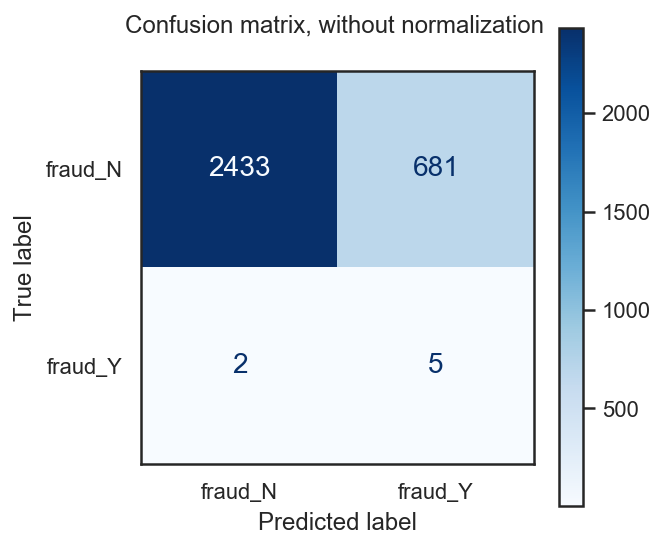

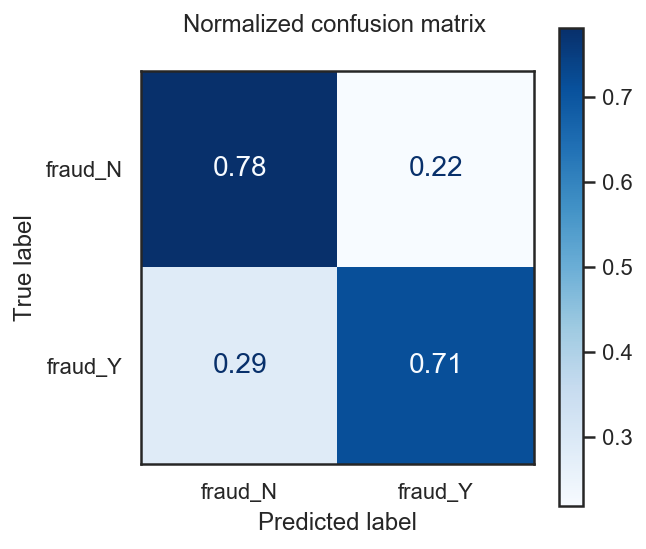

In [27]:
from sklearn.linear_model import LogisticRegression
model31 = LogisticRegression(C=0.01, class_weight={0: 0.5, 1: 0.4},
                           max_iter=200, n_jobs=-1, random_state=4,  tol=0.001)
get_result(model, train_kmeans, test)

In [ ]:
# Model 3-2

√ LogisticRegression(C=0.01, class_weight='balanced', max_iter=200, n_jobs=-1,
                   random_state=4, tol=0.001) 
------------------------------------------------------
Accuracy:  0.5666574915129828 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.998839  0.276172  0.857143  0.432704  0.486538  0.222966      3114
          1   0.002655  0.857143  0.276172  0.005293  0.486538  0.250472         7

avg / total   0.996604  0.277475  0.855840  0.431746  0.486538  0.223028      3121
 

Confusion matrix, without normalization 

[[4502 8343]
 [3782 9063]]
Normalized confusion matrix 

[[0.35048657 0.64951343]
 [0.29443363 0.70556637]]
Confusion matrix, without normalization 

[[ 860 2254]
 [   1    6]]
Normalized confusion matrix 

[[0.27617213 0.72382787]
 [0.14285714 0.85714286]]


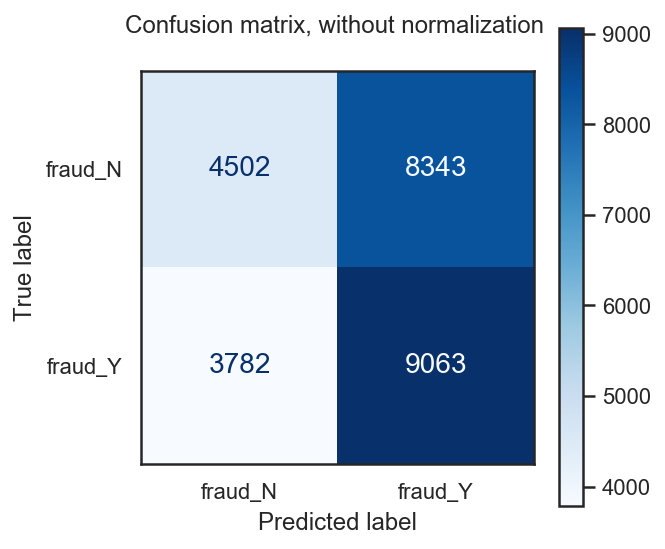

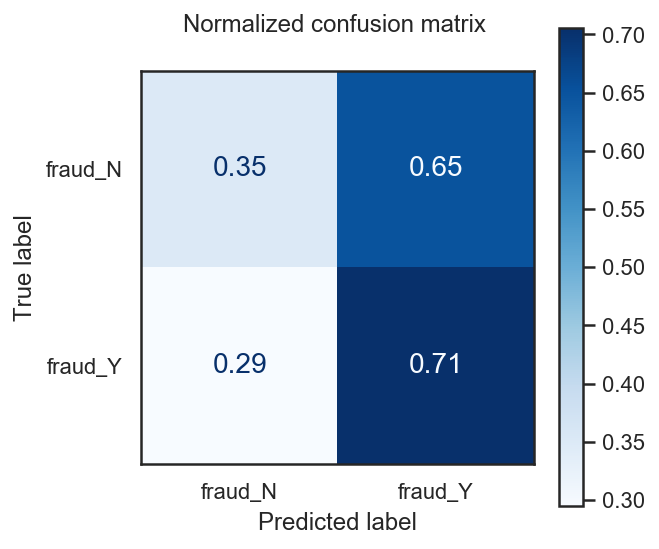

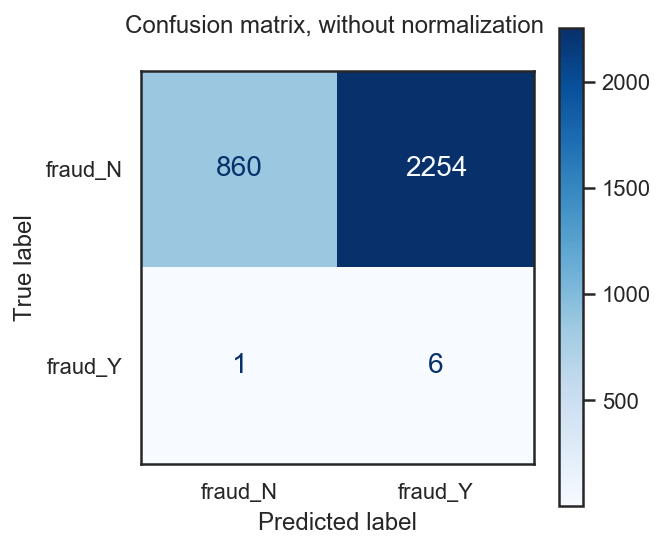

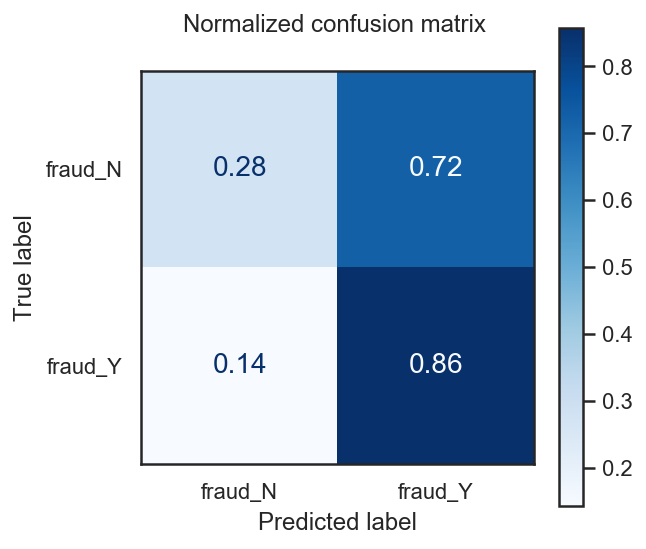

In [28]:
from sklearn.linear_model import LogisticRegression
model32 = LogisticRegression(C=0.01, class_weight='balanced',
                           max_iter=200, n_jobs=-1, random_state=4,  tol=0.001)
get_result(model, train_kmeans, test)

In [29]:
# Model 4-1

√ RandomForestClassifier(class_weight={0: 0.5, 1: 1.4}, max_depth=7,
                       max_features=17, max_leaf_nodes=4, min_samples_leaf=5,
                       min_samples_split=30, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=4) 
------------------------------------------------------
Accuracy:  0.5387879621983668 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.998025  0.649004  0.428571  0.786534  0.527394  0.284276      3114
          1   0.002737  0.428571  0.649004  0.005440  0.527394  0.272014         7

avg / total   0.995792  0.648510  0.429066  0.784782  0.527394  0.284249      3121
 

Confusion matrix, without normalization 

[[ 8439  4406]
 [   11 12834]]
Normalized confusion matrix 

[[6.56987155e-01 3.43012845e-01]
 [8.56364344e-04 9.99143636e-01]]
Confusion matrix, without normalization 

[[2021 1093]
 [   4    3]]
Normal

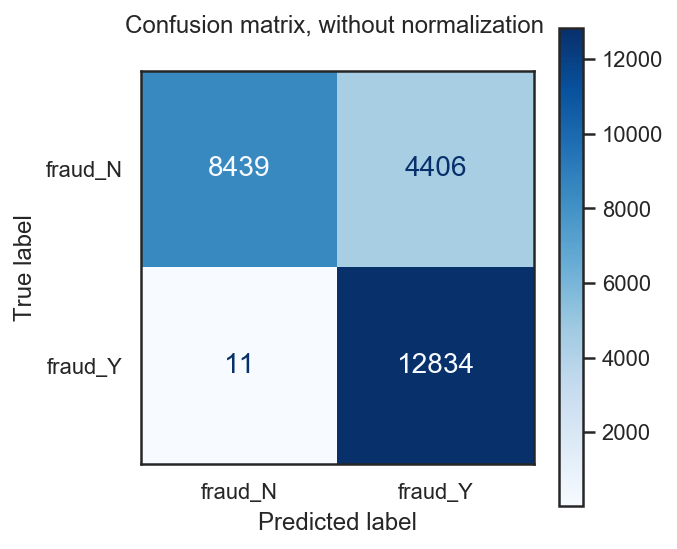

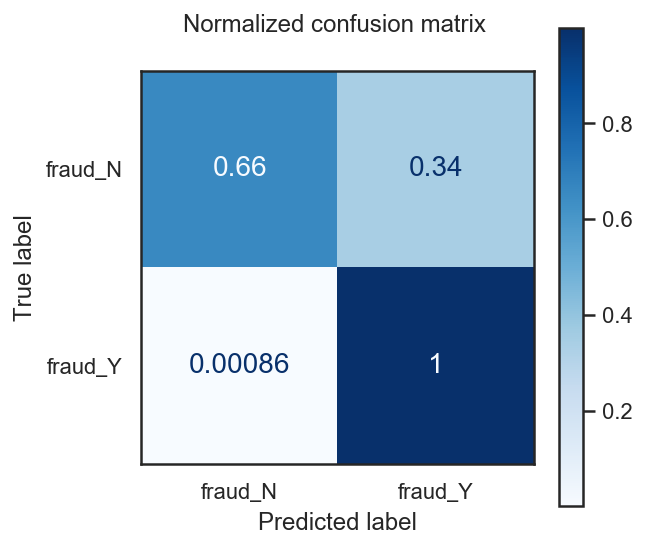

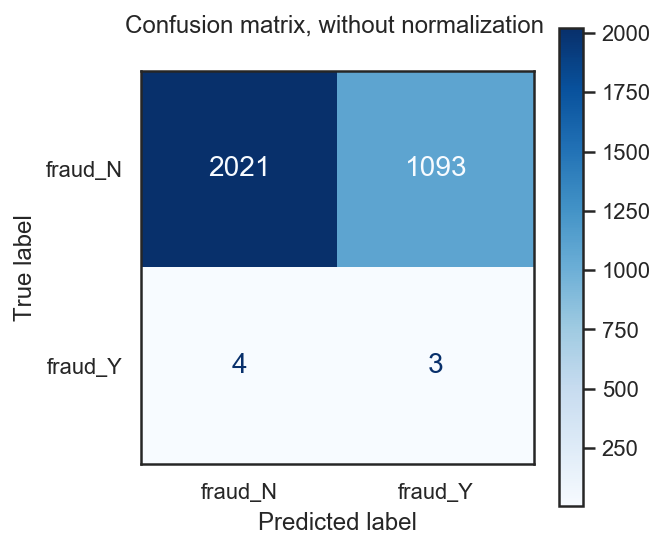

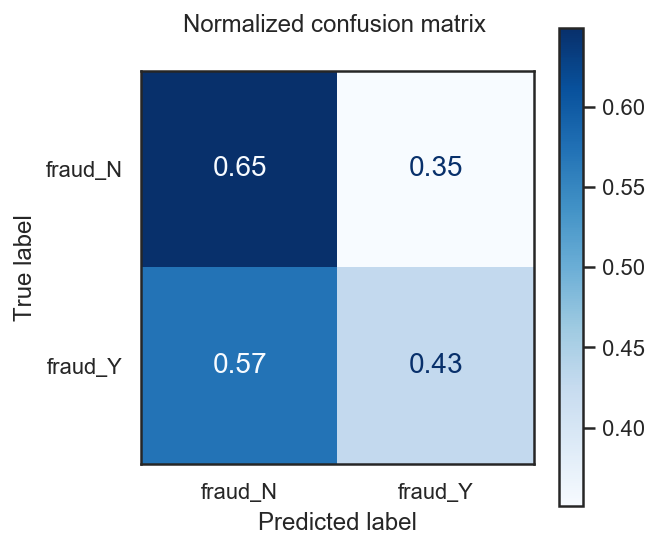

In [30]:
from sklearn.ensemble import RandomForestClassifier

model41 = RandomForestClassifier(class_weight={0: 0.5, 1: 1.4},
                               max_depth=7, max_features=17, max_leaf_nodes=4,
                               min_samples_leaf=5, min_samples_split=30,
                               n_estimators=500, n_jobs=-1, oob_score=True, random_state=4)
get_result(model, train_kmeans, test)

In [31]:
model.oob_score_

0.8294277929155314

In [ ]:
# Model 4-2

√ RandomForestClassifier(class_weight={0: 0.5, 1: 1.4}, max_depth=7,
                       max_features=17, max_leaf_nodes=4, min_samples_leaf=5,
                       min_samples_split=30, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=4) 
------------------------------------------------------
Accuracy:  0.6310900082576383 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.998607  0.690751  0.571429  0.816629  0.628264  0.399425      3114
          1   0.004137  0.571429  0.690751  0.008214  0.628264  0.390005         7

avg / total   0.996377  0.690484  0.571696  0.814816  0.628264  0.399404      3121
 

Confusion matrix, without normalization 

[[ 9051  3794]
 [   14 12831]]
Normalized confusion matrix 

[[0.70463215 0.29536785]
 [0.00108992 0.99891008]]
Confusion matrix, without normalization 

[[2151  963]
 [   3    4]]
Normalized confusion m

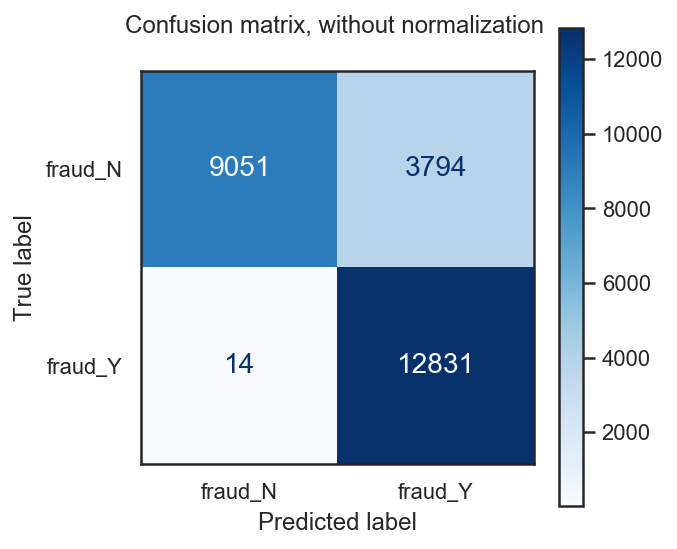

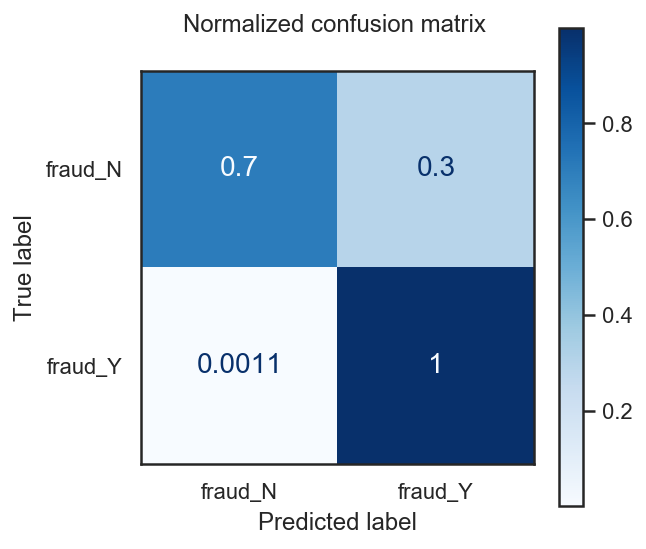

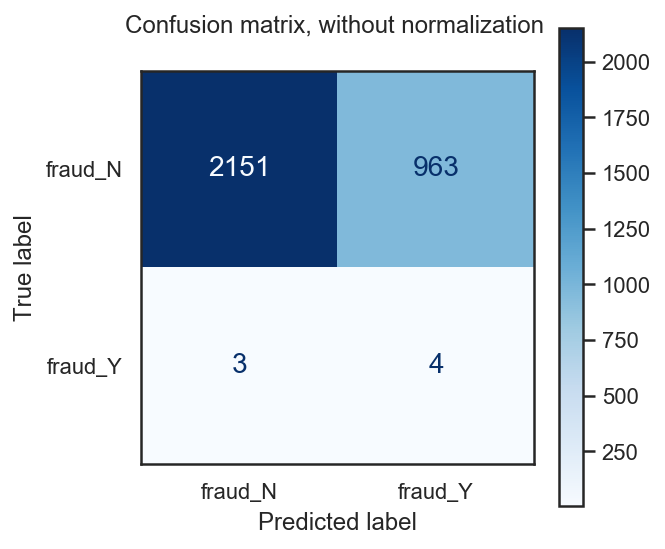

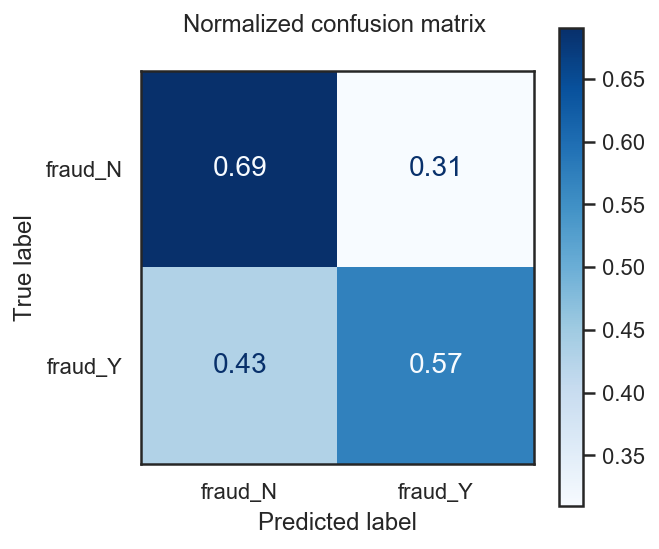

In [32]:
from sklearn.ensemble import RandomForestClassifier

model42 = RandomForestClassifier(class_weight={0: 0.5, 1: 1.4},
                               max_depth=7, max_features=17, max_leaf_nodes=4,
                               min_samples_leaf=5, min_samples_split=30,
                               n_estimators=500, n_jobs=-1, oob_score=True, random_state=4)
get_result(model, train_nan, test)

In [33]:
model.oob_score_

0.8499805371739977

In [34]:
# Model 5-1

√ LogisticRegression(C=0.01, class_weight={0: 0.2, 1: 4.5}, max_iter=200,
                   n_jobs=-1, random_state=4, solver='liblinear', tol=0.001) 
------------------------------------------------------
Accuracy:  0.5 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.000000  0.000000  1.000000  0.000000  0.000000  0.000000      3114
          1   0.002243  1.000000  0.000000  0.004476  0.000000  0.000000         7

avg / total   0.000005  0.002243  0.997757  0.000010  0.000000  0.000000      3121
 

Confusion matrix, without normalization 

[[    0 12845]
 [    0 12845]]
Normalized confusion matrix 

[[0. 1.]
 [0. 1.]]
Confusion matrix, without normalization 

[[   0 3114]
 [   0    7]]
Normalized confusion matrix 

[[0. 1.]
 [0. 1.]]


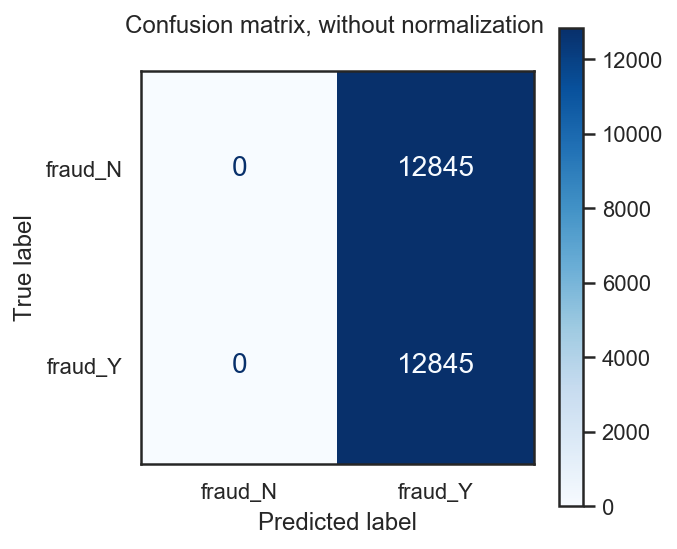

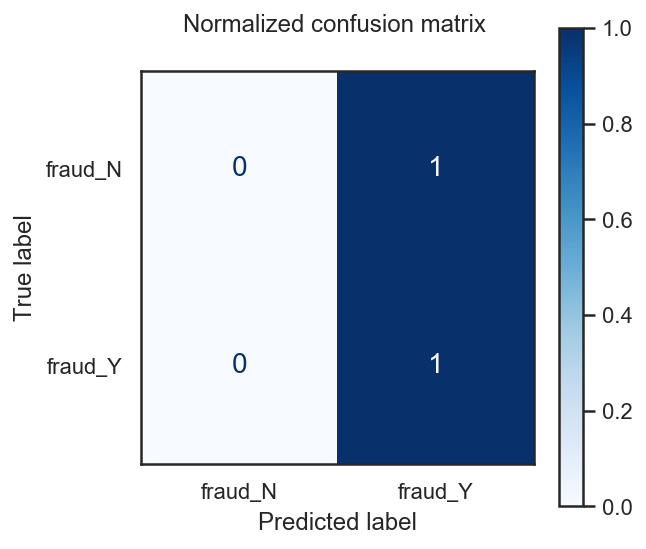

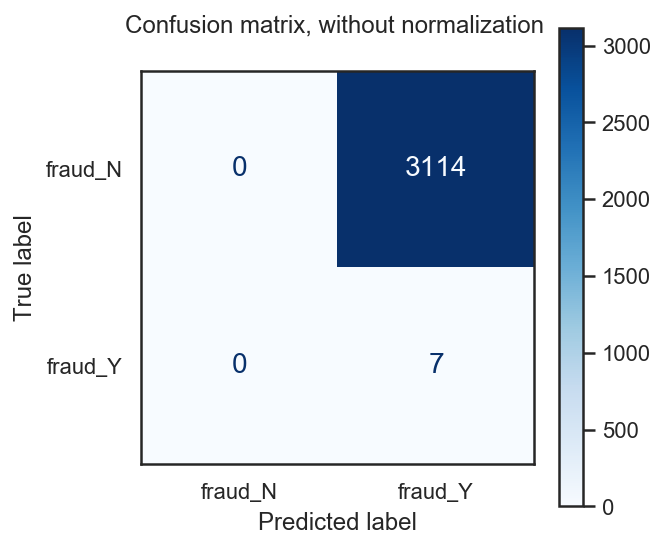

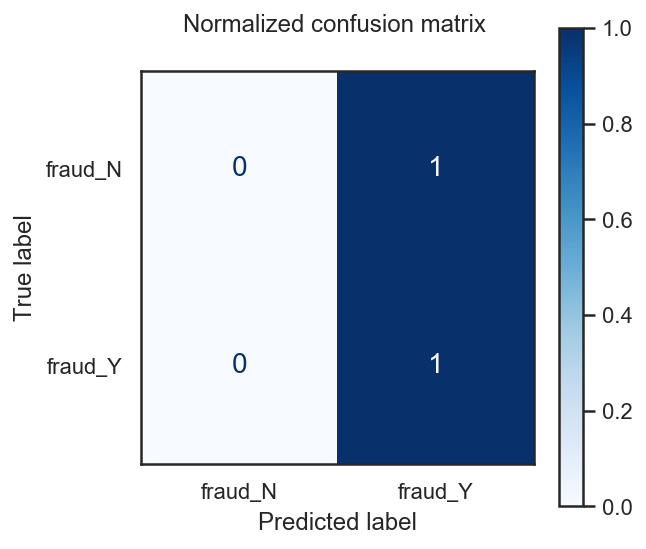

In [43]:
from sklearn.linear_model import LogisticRegression
model51 = LogisticRegression(C=0.01, class_weight={0:0.2, 1:4.5},
                           max_iter=200, n_jobs=-1, random_state=4,
                           solver='liblinear', tol=0.001)
get_result(model, train_nan, test)

In [ ]:
# Model 5-2

√ LogisticRegression(C=0.01, class_weight={0: 0.2, 1: 4.5}, max_iter=200,
                   n_jobs=-1, random_state=4, solver='liblinear', tol=0.001) 
------------------------------------------------------
Accuracy:  0.6991237728231947 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.999407  0.541105  0.857143  0.702083  0.681032  0.449146      3114
          1   0.004181  0.857143  0.541105  0.008322  0.681032  0.478462         7

avg / total   0.997175  0.541814  0.856434  0.700527  0.681032  0.449212      3121
 

Confusion matrix, without normalization 

[[ 7457  5388]
 [    7 12838]]
Normalized confusion matrix 

[[5.80537174e-01 4.19462826e-01]
 [5.44959128e-04 9.99455041e-01]]
Confusion matrix, without normalization 

[[1685 1429]
 [   1    6]]
Normalized confusion matrix 

[[0.54110469 0.45889531]
 [0.14285714 0.85714286]]


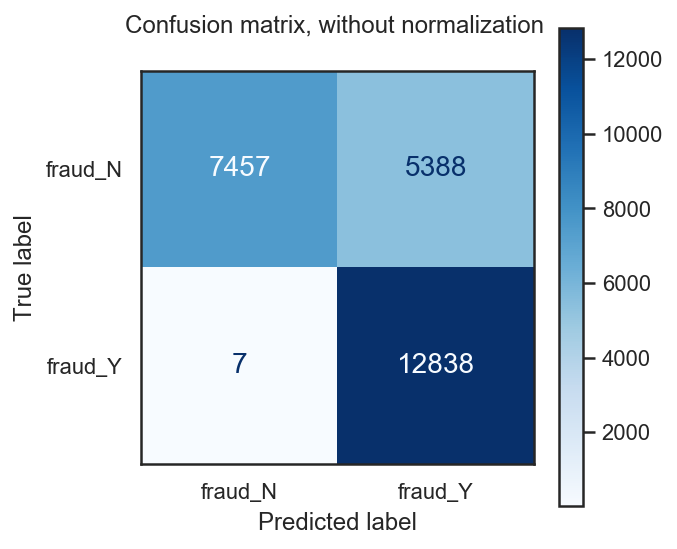

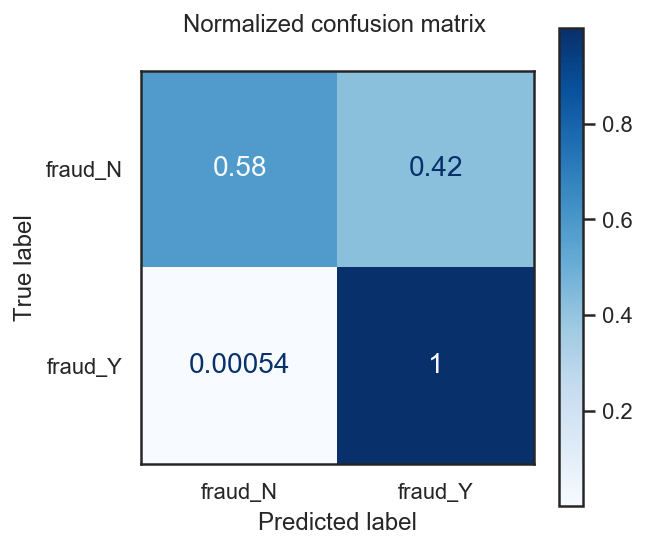

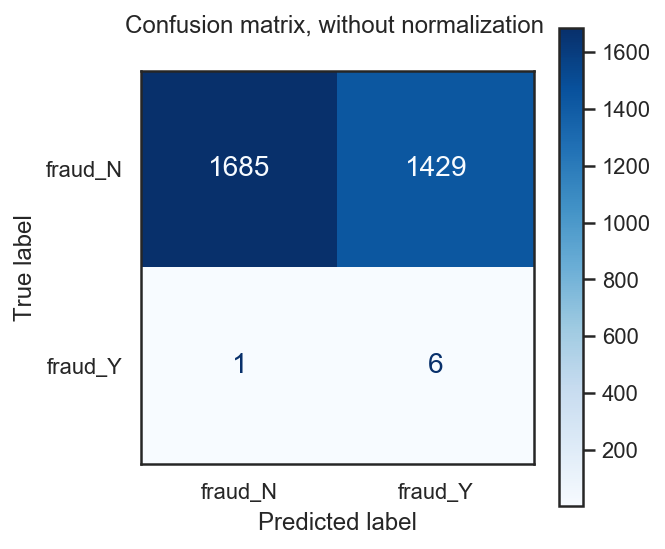

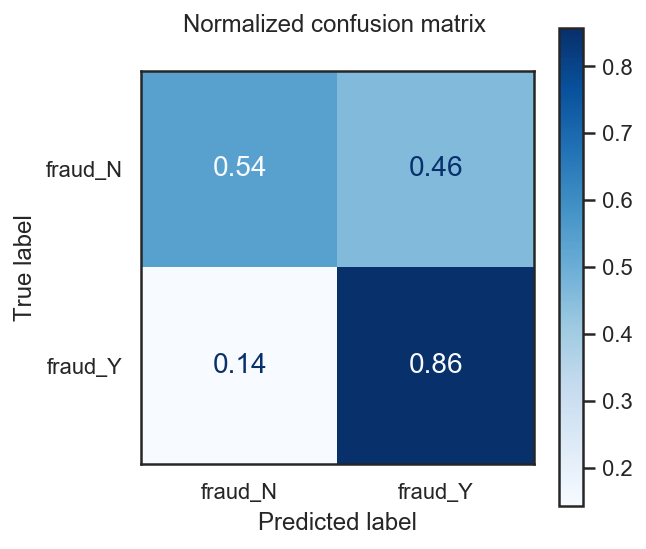

In [42]:
from sklearn.linear_model import LogisticRegression
model52 = LogisticRegression(C=0.01, class_weight={0:0.2, 1:4.5},
                           max_iter=200, n_jobs=-1, random_state=4,
                           solver='liblinear', tol=0.001)
get_result(model, train_nan, test, scale=rs)

In [38]:
# Model 5-3

√ LogisticRegression(C=0.01, class_weight={0: 0.2, 1: 4.5}, max_iter=200,
                   n_jobs=-1, random_state=4, solver='liblinear', tol=0.001) 
------------------------------------------------------
Accuracy:  0.6989632076337278 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.999407  0.540784  0.857143  0.701813  0.680829  0.448865      3114
          1   0.004178  0.857143  0.540784  0.008316  0.680829  0.478193         7

avg / total   0.997174  0.541493  0.856433  0.700257  0.680829  0.448930      3121
 

Confusion matrix, without normalization 

[[ 7418  5427]
 [    7 12838]]
Normalized confusion matrix 

[[5.77500973e-01 4.22499027e-01]
 [5.44959128e-04 9.99455041e-01]]
Confusion matrix, without normalization 

[[1684 1430]
 [   1    6]]
Normalized confusion matrix 

[[0.54078356 0.45921644]
 [0.14285714 0.85714286]]


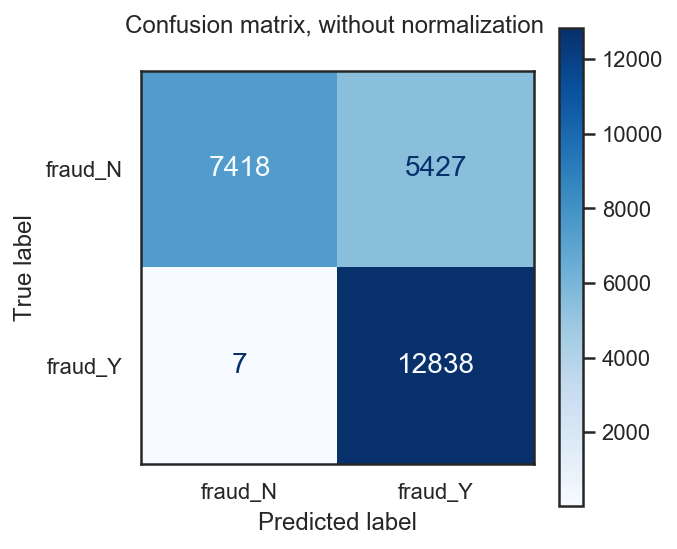

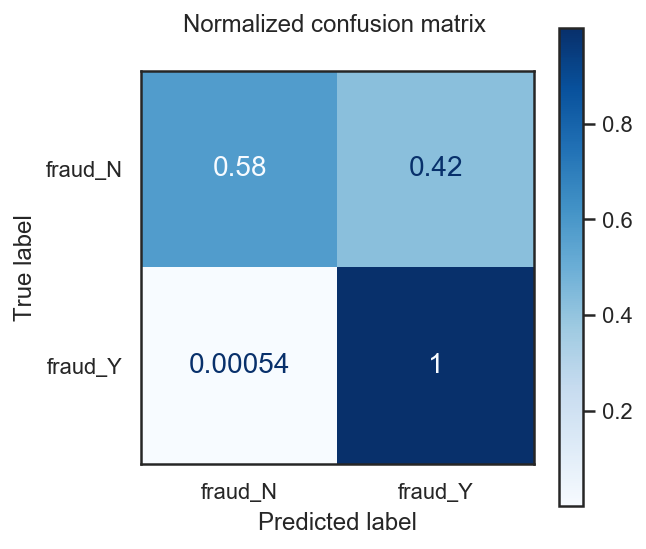

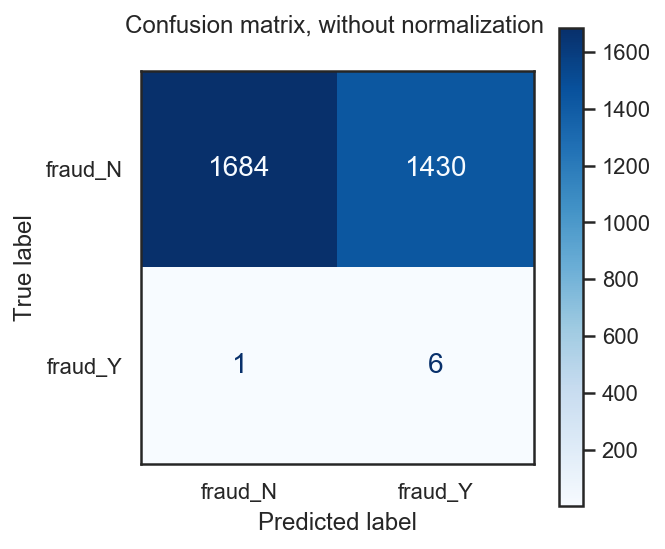

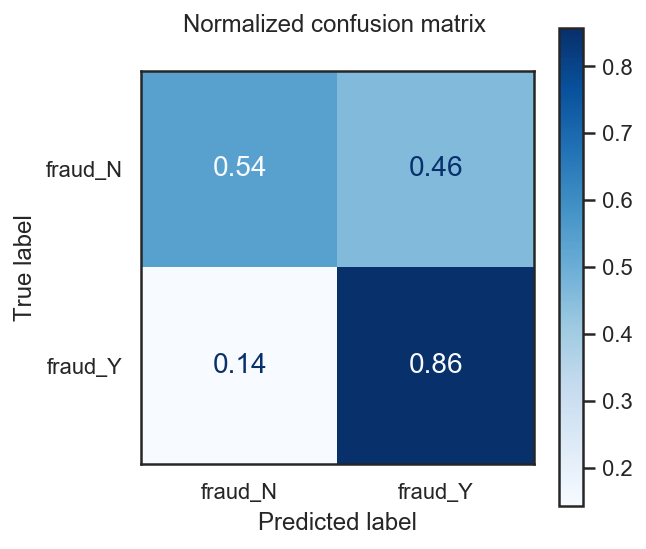

In [41]:
from sklearn.linear_model import LogisticRegression
model53 = LogisticRegression(C=0.01, class_weight={0:0.2, 1:4.5},
                           max_iter=200, n_jobs=-1, random_state=4,
                           solver='liblinear', tol=0.001)
get_result(model, train_nan, test, scale=ss)